# Data Analysis

### Installing requirements

In [48]:
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

### Loading Dataset

In [49]:
df_train = pd.read_csv("./Data/internship_train.csv")
df_test = pd.read_csv("./Data/internship_hidden_test.csv")

# Combined dataset
combined = [df_train, df_test]

In [50]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


### Descriptive analysis

In [51]:
#=======================================================================================
# Discovering the features types:
#=======================================================================================

df_train.info()
print("_" * 40)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

Feature discovering results:

<ol>
    <li>Features of the test data are the same as features of the training data</li>
    <li>All features are either of float64 or int64 type</li>
    <li>There are no missing values</li>
</ol>

In [52]:
#=======================================================================================
# Discovering the numerical data distribution :
#=======================================================================================

df_train_stats = df_train.describe()
df_train_stats.loc['var'] = df_train.var().tolist()
df_train_stats.loc['skew'] = df_train.skew().tolist()
df_train_stats.loc['kurt'] = df_train.kurt().tolist()

df_train_stats

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,...,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,249.423944,250.236267,248.637289,249.736600,249.436178,249.656167,-0.011402,0.498548,0.499189,249.842033,...,7.475155,7.523962,7.508397,7.473322,7.490658,7.474578,7.509206,7.487159,7.513316,50.033981
std,144.336393,144.022200,144.107577,144.284945,143.941581,144.329168,7.038171,0.288682,0.500002,144.612718,...,4.330410,4.321537,4.331761,4.335692,4.332122,4.323035,4.326364,4.324876,4.333080,28.897243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,...,0.000019,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,125.000000,126.000000,124.000000,125.000000,125.000000,124.000000,-7.071068,0.248932,0.000000,124.000000,...,3.707544,3.797002,3.760627,3.715721,3.739358,3.715298,3.773381,3.743536,3.776322,25.091903
50%,250.000000,251.000000,248.000000,250.000000,250.000000,250.000000,0.000000,0.497136,0.000000,250.000000,...,7.474127,7.533987,7.505259,7.459774,7.494167,7.477270,7.512575,7.476564,7.506812,50.030705
75%,374.000000,375.000000,374.000000,375.000000,373.000000,374.000000,7.000000,0.747513,1.000000,376.000000,...,11.216585,11.276349,11.261971,11.215637,11.239232,11.210070,11.268156,11.234414,11.277835,75.059454
max,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,9.949874,0.999987,1.000000,499.000000,...,14.999900,14.999528,14.999733,14.999478,14.999869,14.999928,14.999948,14.999364,14.999775,99.999482
var,20832.994427,20742.393960,20766.993696,20818.145400,20719.178740,20830.908800,49.535854,0.083338,0.250002,20912.838245,...,18.752447,18.675683,18.764157,18.798221,18.767280,18.688628,18.717428,18.704554,18.775582,835.050635
skew,-0.006187,-0.006009,0.008612,-0.002684,-0.000764,-0.001232,0.003641,0.008397,0.003245,-0.001524,...,0.005491,-0.007169,0.000667,0.007119,-0.001527,0.007296,-0.006558,0.006886,-0.002838,-0.004203


Numerical data distribution discovering results:

<ol>
    <li>There are groups of features that are having approximately the same distribution</li>
    <li>Features have a big variance</li>
    <li>Negative kurtosis indicates that the data exhibit less extreme outliers than a normal distribution</li>
    <li>Data is not skewed</li>
</ol>

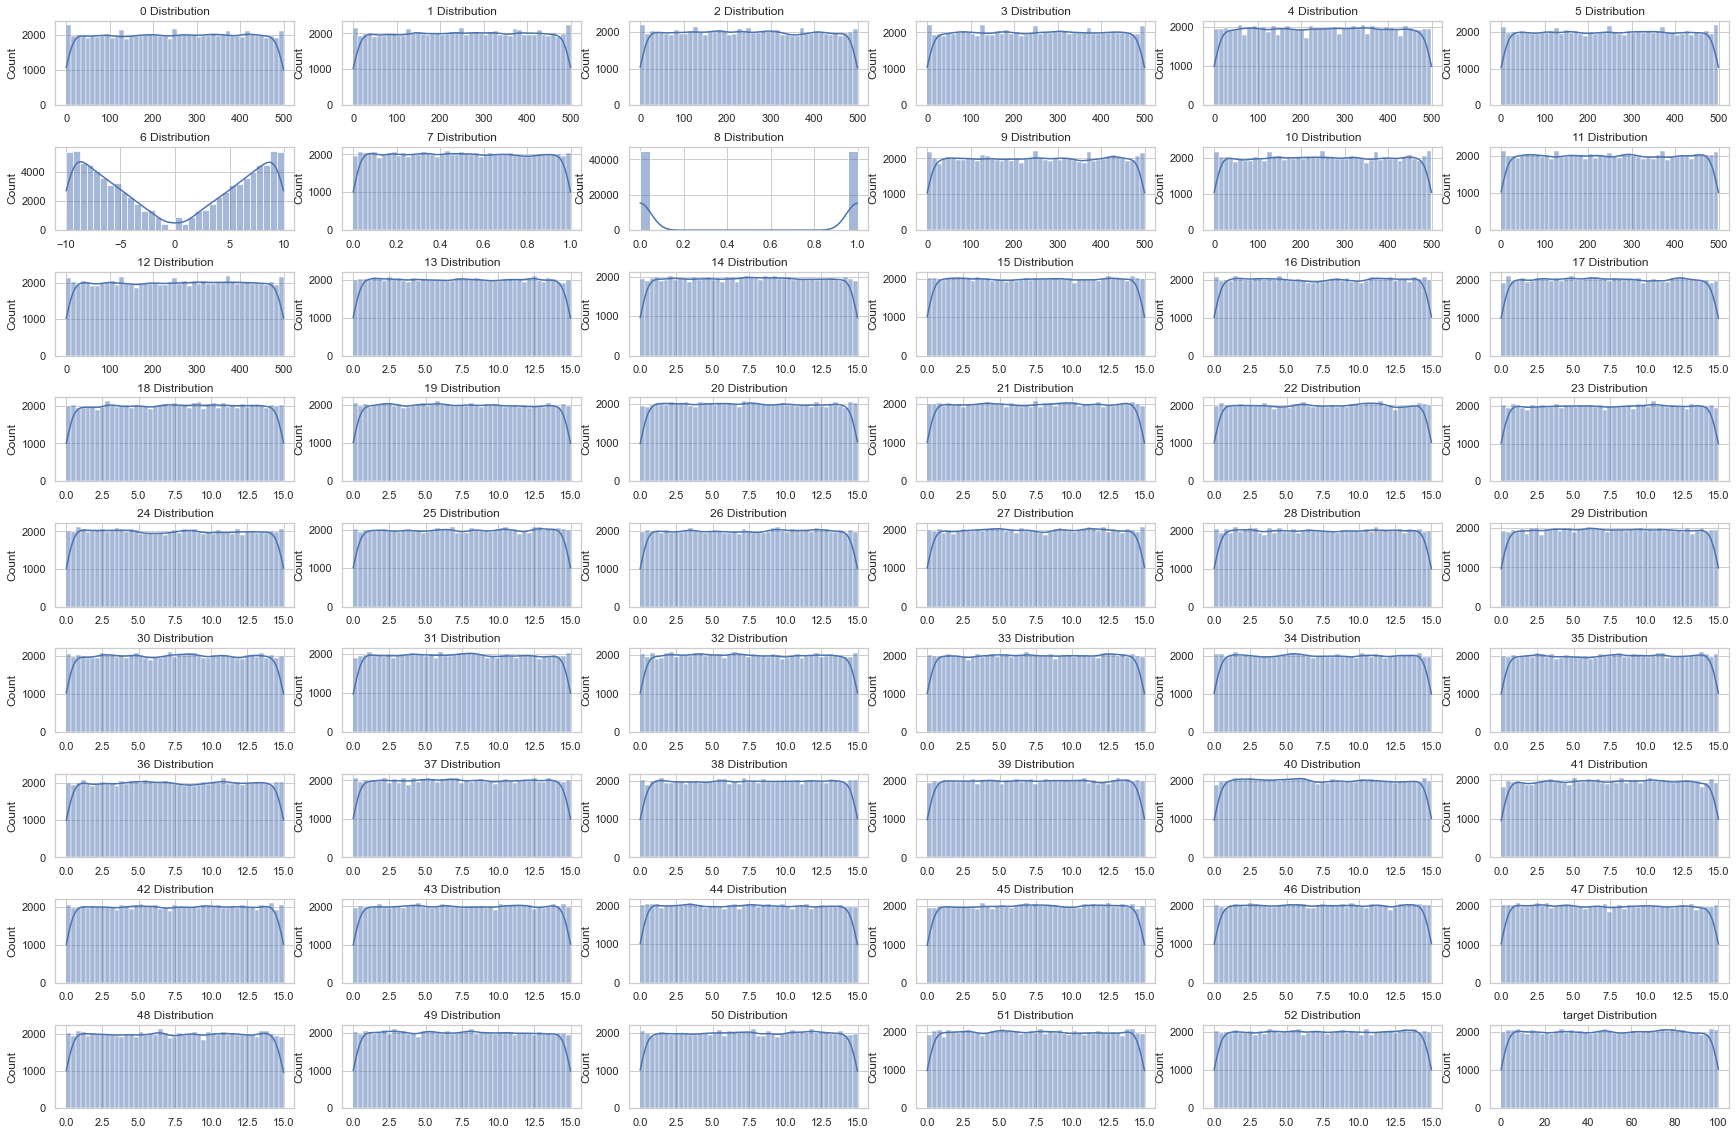

In [53]:
#=======================================================================================
# Numerical data distributions :
#=======================================================================================

fig, ax = plt.subplots(9, 6, figsize=(30, 20))
ax = ax.flatten()

for i, var in enumerate(df_train):
    sns.histplot(data=df_train, x=var, kde=True, ax=ax[i])
    ax[i].set_title(f"{var} Distribution")
    ax[i].set(xlabel=None)

plt.subplots_adjust(hspace=0.5)
plt.show()

Numerical data distributions discovering results:

<ol>
    <li>Almost all the features are approximately uniformly distributed</li>
    <li>Feature 6 has more extreme values than the average and has a big variance</li>
    <li>Feature 8 is categorical</li>
    <li>There are no outliers</li>
</ol>

### Correlation analysis

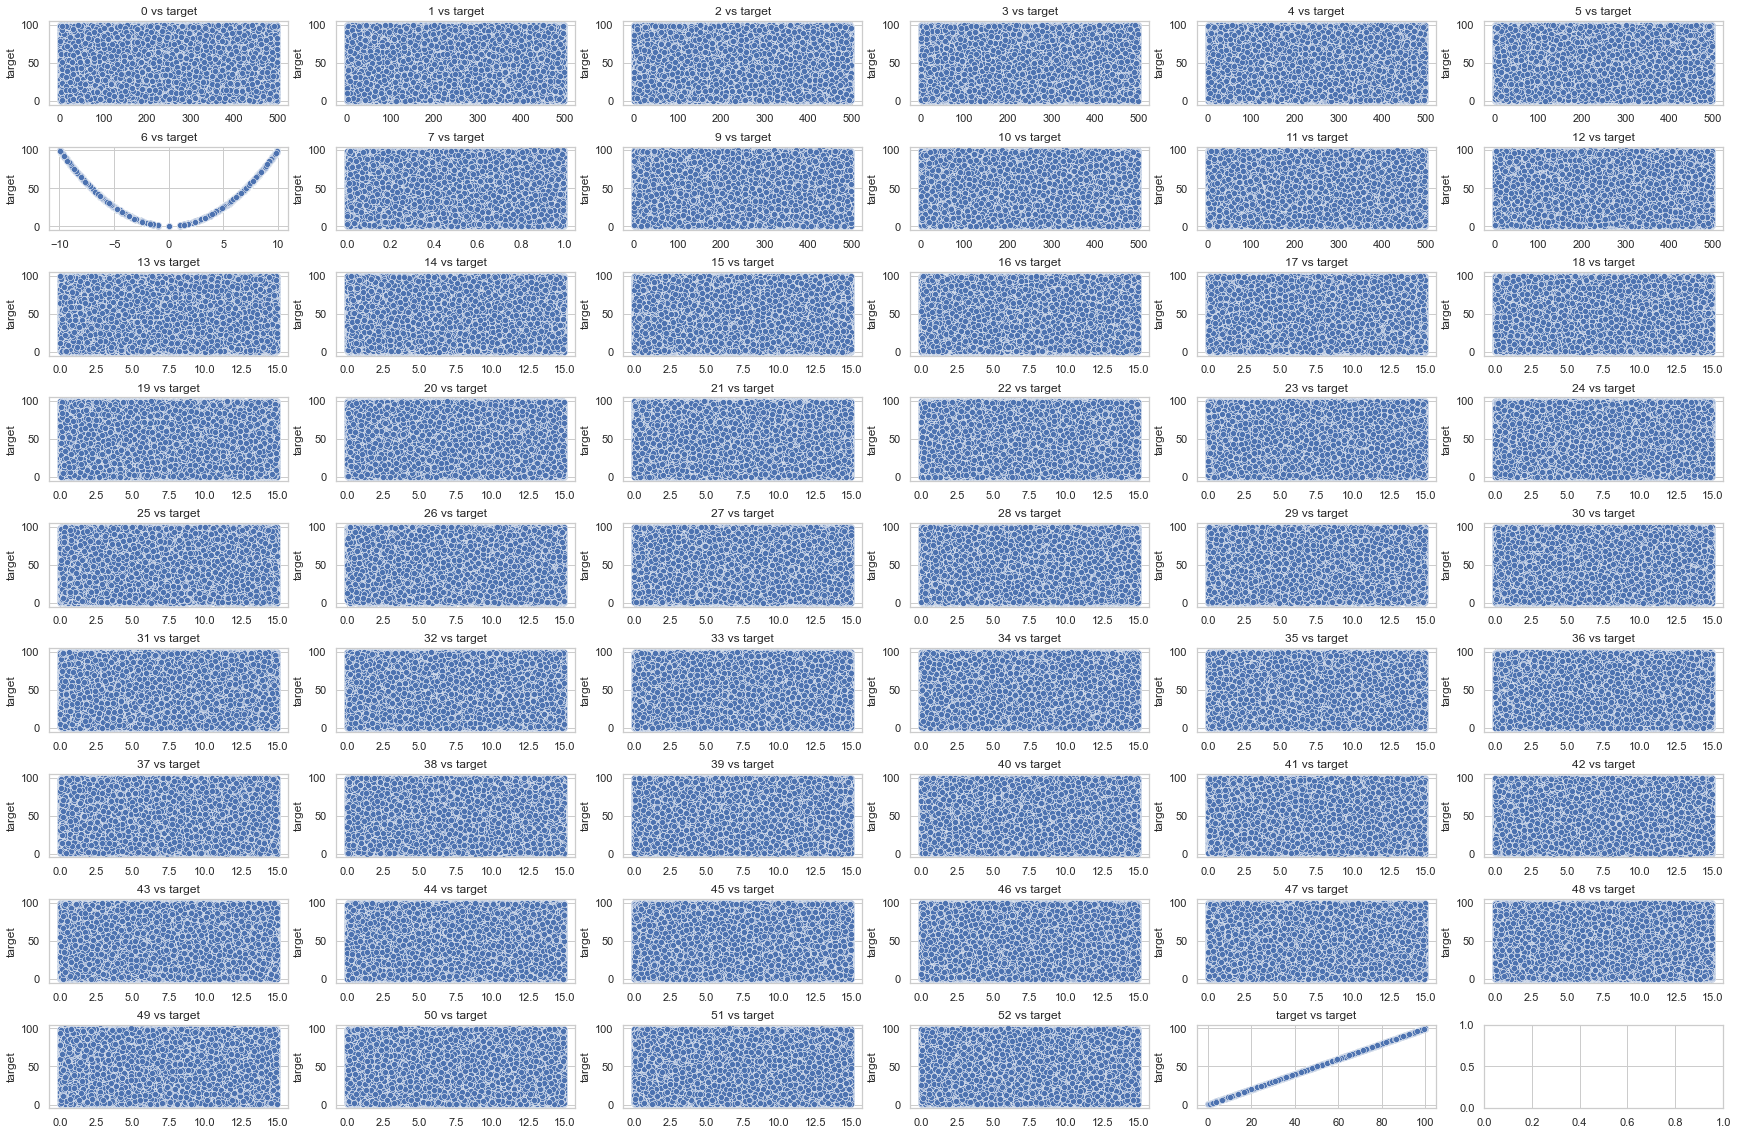

In [54]:
#=======================================================================================
# Numerical versus numerical correlations :
#=======================================================================================

fig, ax = plt.subplots(9, 6, figsize=(30, 20))
ax = ax.flatten()


for i, var in enumerate(df_train.loc[:, df_train.columns != '8'].columns.tolist()):
    sns.scatterplot(data=df_train.loc[:, df_train.columns != '8'], x=var, y='target', ax=ax[i])
    ax[i].set_title(f"{var} vs target")
    ax[i].set(xlabel=None)

plt.subplots_adjust(hspace=0.5)
plt.show()

We can clearly see, that feature 6 and target feature have a quadratic dependence

In [55]:
# Transforming feature 6 in order to get a linear dependence with target
for df in combined:
    # Creating new feature - 6 (squared)
    df['6sqr'] = df['6'] ** 2

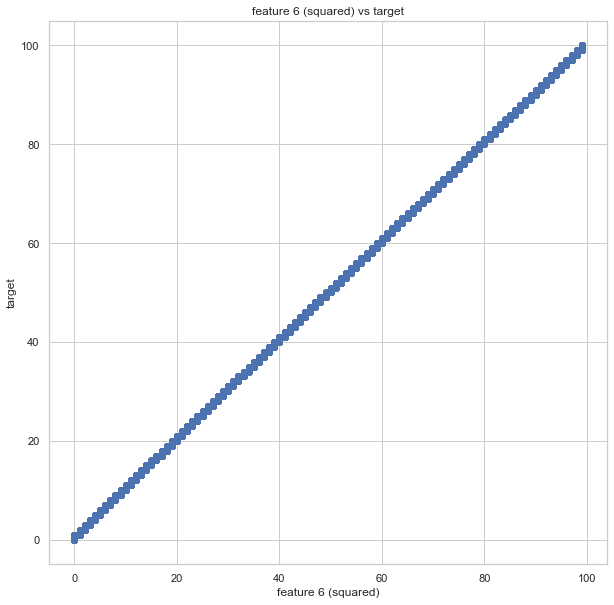

In [56]:
plt.scatter(data = df_train, x='6sqr', y='target')

plt.xlabel('feature 6 (squared)')
plt.ylabel('target')
plt.title("feature 6 (squared) vs target")

plt.show()

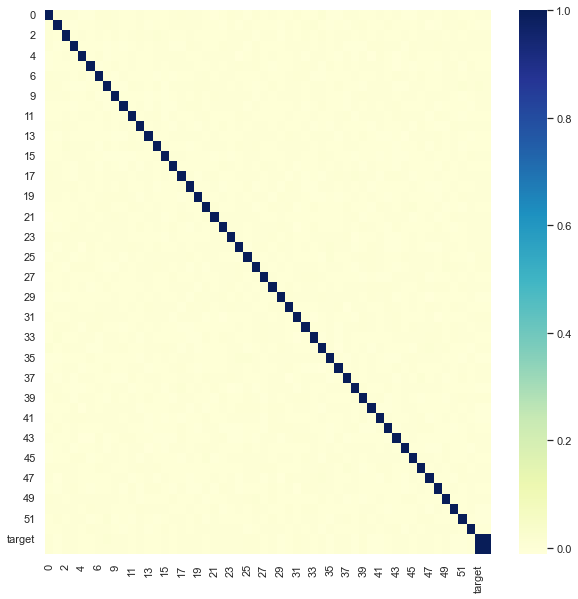

In [57]:
#=======================================================================================
# Heatmap of Pearson correlation :
#=======================================================================================

sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(df_train.loc[:, df_train.columns != "8"].corr(), annot = False, fmt='.2g',cmap= 'YlGnBu')

plt.show()

In [58]:
df_train.loc[:, df_train.columns != "8"].corr()

,0,1,2,3,4,5,6,7,9,10,...,45,46,47,48,49,50,51,52,target,6sqr
0,1.000000,0.002009,0.001170,0.002957,-0.003764,-0.007362,0.007855,0.007174,0.002339,0.000066,...,-6.524791e-03,0.003532,0.000310,-0.002639,0.004795,0.000287,-0.001647,-0.003612,0.002427,0.002356
1,0.002009,1.000000,-0.001849,-0.004653,-0.002433,-0.002037,0.004181,0.005790,0.002592,-0.002682,...,-2.679358e-03,0.001402,-0.007900,-0.004497,0.002015,0.003119,0.006038,-0.003173,-0.005545,-0.005603
2,0.001170,-0.001849,1.000000,-0.000775,0.003082,-0.002161,0.002296,-0.000299,0.005753,-0.002199,...,-5.881274e-04,0.000643,0.003106,0.001611,-0.001444,0.001006,-0.001753,0.002812,0.001003,0.001006
3,0.002957,-0.004653,-0.000775,1.000000,-0.003623,-0.001038,0.000223,-0.004290,0.000202,-0.004965,...,4.776979e-03,0.001334,0.000528,0.006892,0.002790,0.002082,0.000373,0.002534,0.002807,0.002850
4,-0.003764,-0.002433,0.003082,-0.003623,1.000000,-0.000992,0.005602,-0.004459,-0.000778,-0.000388,...,6.178204e-03,-0.000873,-0.002625,-0.001883,0.002884,-0.000702,0.001067,-0.002388,-0.001300,-0.001256
5,-0.007362,-0.002037,-0.002161,-0.001038,-0.000992,1.000000,-0.003869,-0.001455,0.004740,-0.003559,...,-5.225882e-03,-0.000776,-0.000087,-0.004682,0.000988,0.004735,-0.004100,0.004946,-0.002125,-0.002110
6,0.007855,0.004181,0.002296,0.000223,0.005602,-0.003869,1.000000,-0.002051,-0.007185,0.001613,...,-3.255019e-05,0.005084,-0.002972,-0.002300,0.003611,0.001542,-0.000944,0.002867,0.000666,0.000687
7,0.007174,0.005790,-0.000299,-0.004290,-0.004459,-0.001455,-0.002051,1.000000,-0.007187,-0.005711,...,2.936529e-03,0.003277,-0.001273,-0.000669,0.001930,0.001085,0.008363,0.001724,0.012103,0.002113
9,0.002339,0.002592,0.005753,0.000202,-0.000778,0.004740,-0.007185,-0.007187,1.000000,0.000022,...,1.417241e-03,-0.002239,0.002636,0.004146,0.001255,-0.000016,-0.003785,-0.003467,0.001504,0.001576
10,0.000066,-0.002682,-0.002199,-0.004965,-0.000388,-0.003559,0.001613,-0.005711,0.000022,1.000000,...,-1.389280e-04,-0.001841,0.001318,-0.006083,-0.000518,-0.002152,-0.001918,-0.004701,0.003396,0.003453


Numerical versus numerical correlations discovering results:

<ol>
    <li>There is very strong linear dependance between feature 6 (squared) and target</li>
    <li>There are no linear correlations between other numerical features</li>
</ol>

In [59]:
#=======================================================================================
# Categorical versus numerical correlations :
#=======================================================================================

first_group = df_train.loc[df_train['8'] == 0].loc[:, df_train.columns != '8']
second_group = df_train.loc[df_train['8'] == 1].loc[:, df_train.columns != '8']

In [60]:
#=======================================================================================
# T-test :
#=======================================================================================

ttest = sp.stats.ttest_ind(first_group, second_group)
ttest_res = pd.DataFrame({
    "Categorical": list('8' * 54),
    "Value 1": list('0' * 54),
    "Value 2": list('1' * 54),
    "Numerical": df_train.loc[:, df_train.columns != "8"].columns.tolist(),
    "p-value": ttest[1],
    "t-statistic": ttest[0]
})

ttest_res = ttest_res.set_index("Numerical")
ttest_res.loc[ttest_res['p-value'] <= 0.05]

,Categorical,Value 1,Value 2,p-value,t-statistic
Numerical,,,,,
0,8,0,1,0.016249,-2.403316
6,8,0,1,0.000000,-826.665693
9,8,0,1,0.027028,2.211153
16,8,0,1,0.025268,2.237313
43,8,0,1,0.042071,-2.032849
46,8,0,1,0.040246,-2.051245


In [61]:
#=======================================================================================
# ANOVA :
#=======================================================================================

anova = sp.stats.f_oneway(first_group, second_group)
anova_res = pd.DataFrame({
    "Categorical": list('8' * 54),
    "Numerical": df_train.loc[:, df_train.columns != "8"].columns.tolist(),
    "p-value": anova[1],
    "f-statistic": anova[0]
})

anova_res = anova_res.set_index("Numerical")
anova_res.loc[anova_res['p-value'] <= 0.05]

,Categorical,p-value,f-statistic
Numerical,,,
0,8,0.016249,5.775928
6,8,0.000000,683376.167914
9,8,0.027028,4.889198
16,8,0.025268,5.005570
43,8,0.042071,4.132476
46,8,0.040246,4.207605


Categorical versus numerical correlations discovering results:

<ol>
    <li>Feature 8 has a strong correlation with features: 0, 6, 9, 16, 43, 46</li>
</ol>

### Data Analysis Results

<ol>
    <li>Only feature 6 (squared) has a strong correlation with target</li>
    <li>Feature 6 and 8 are highly correlated. We will need to handle it in order to avoid multicollinearity</li>
</ol>

In [62]:
# Saving DataFrames into csv files

df_train.to_csv('Data/train.csv', index=False)
df_test.to_csv('Data/test.csv', index=False)

print("Saved")

Saved
